# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import random

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("Loading Complete")

X_train shape: (39209, 32, 32, 3)
y_train shape: (39209,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)
Loading Complete


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

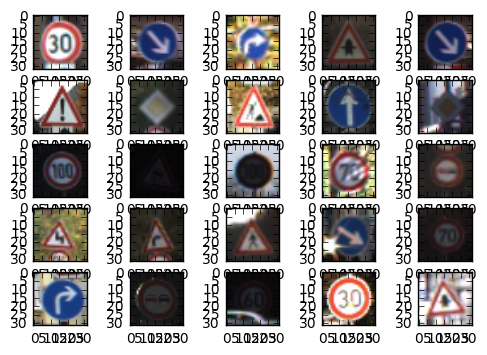

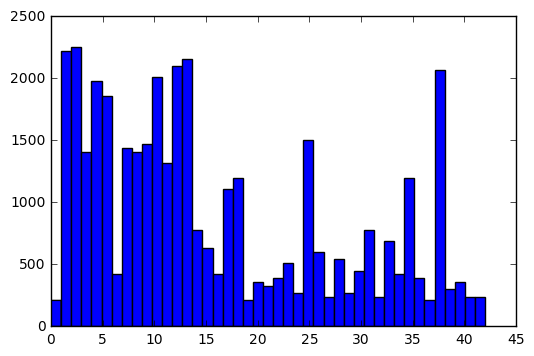

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def visualize(img_arr):
    plot = plt.figure()    
    for i in range(1,26):
        grid = plot.add_subplot(5,5,i)
        grid.imshow(X_test[i])        
    plt.show()

visualize(X_train)

#REVIEW UPDATE
plt.hist(train['labels'], bins=n_classes)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Grayscale X_train shape: (39209, 32, 32, 1)
Grayscale X_test shape: (12630, 32, 32, 1)


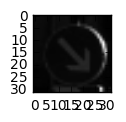

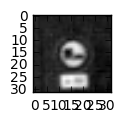

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#Some imports
from skimage.color import rgb2gray

#First Shuffle dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Second, Convert images to Grayscale (i.e single channel)
def gray_scale(img_arr):
    gray_arr= np.sum(img_arr/3, axis=3, keepdims=True)
    
    #Random test print for graymap image
    index = random.randint(0, len(gray_arr))
    image = gray_arr[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")  
    return gray_arr
    

X_train = gray_scale(X_train)
X_test = gray_scale(X_test)

print("Grayscale X_train shape:",X_train.shape)
print("Grayscale X_test shape:",X_test.shape)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
Step 1: Applied a simple shuffle on the trianing data.
Step 2: Convert the RGB images in training data(3-Channel) to Grayscale (1- Channel)

I did try normalizing the data as suggested on the Forums, But my accuracy kept falling. Will look into this later. 

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)
print("X_validation shape:",X_validation.shape)

X_validation shape: (7842, 32, 32, 1)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I used the same method as in the LeNet lab. Used sklearn to generate validation set from the training data.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

#Hyperparameters
EPOCHS = 55
BATCH_SIZE = 128
rate = 0.0008

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    fc0 = tf.nn.dropout(fc0,keep_prob)         #DROPOUT 1
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)          #DROPOUT 2
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2,keep_prob)           #DROPOUT 3
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#tf.reset_default_graph()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The architecture, sizes and connectivity are based on the LeNet lab with the introduction of dropouts before the first and the second fully connected layers. I chose to perfrom drop out before the fully connected layers based off of the lessons. The introduction of Dropout significantly increased the overall training accuracy.



UPDATE: Layer Overview:
        1.  Convolution layer 1 with Input = 32x32x1. Output = 28x28x6.
        2.  RELU Activation function 1.
        3.  Pooling layer 1 of size 2x2, with Input = 28x28x6. Output = 14x14x6.
        4.  Convolution layer 2 with Output = 10x10x16.
        5.  RELU Activation function 2.
        6.  Pooling layer 2 with Input = 10x10x16. Output = 5x5x16.
        7.  Flatten Layer 1
        8.  Dropout 1
        9.  Fully Connected layer 1 with Input = 400. Output = 120.
        10. RELU Activation function 2.
        11. Droptout 2
        12. Fully Connected layer 2 with Input = 120. Output = 84.
        13. RELU Activation function 3.
        14. Fully Connected layer 3 eith Input = 84. Output = 43.

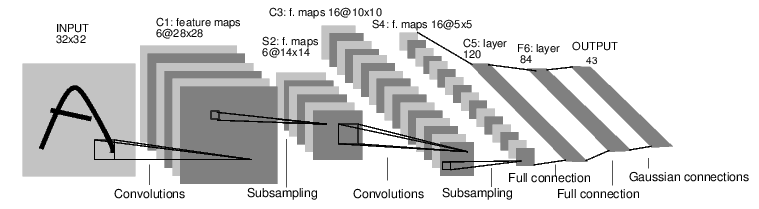

In [7]:
from IPython.display import Image
Image(filename=('./lenet5.png'))

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    softmax = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(softmax, k =3)
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.563

EPOCH 2 ...
Validation Accuracy = 0.802

EPOCH 3 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.913

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.943

EPOCH 7 ...
Validation Accuracy = 0.950

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.955

EPOCH 10 ...
Validation Accuracy = 0.964

EPOCH 11 ...
Validation Accuracy = 0.965

EPOCH 12 ...
Validation Accuracy = 0.966

EPOCH 13 ...
Validation Accuracy = 0.966

EPOCH 14 ...
Validation Accuracy = 0.973

EPOCH 15 ...
Validation Accuracy = 0.967

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.976

EPOCH 18 ...
Validation Accuracy = 0.968

EPOCH 19 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.973

EPOCH 21 ...
Validation Accuracy = 0.976

EPOCH 22 ...
Validation Accuracy = 0.977

EPOCH 23 ...
Validation Accuracy = 0.980

EPOCH 24 ...
Validation Accura

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.951


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** The optimizer was again based on the LeNet Lab (Adam optimizer). Here are the Hyper Parameters:
    1. EPOCH Size: 55
    2. Batch Size: 128
    3. Learning Rate: 0.0008
    4. Keep Prob: 0.5 (As suggested in the lessons)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I began by adapting the vanilla LeNet architecure to work with 3 channel images. This required some input tunning and modifying the convolutional inputs, and classifer variables for the onehot encodding. At this point I decided to perform an initial training to establish a baseline accuracy. This model generated an accuracy of 77% on the validation tests. 

Next, I began to preprocess the input by applying shuffling and converting the images to gray scale. This increased the accuracy to 88%. I later tried to apply normalizaiton on the training data, but this yeilded in lower accuracy rates (Still need to figure out the reasoning for the drop in accuracy). In the interest of time, I removed normalization and proceeded to tune the hyper parameters. Based on the lessons, I chose to lower the learning rate, and tweak the batch size and EPOCHs. This yielded in an accuracy rate of 92%.

Next up I started introducing dropouts before every fully connected layer on a trial and error basis. This improved the accuracy rate to 94.1 and sometimes 95%.

REVIEW UPDATE: By introducing dropouts, my intenstions were to avoid overfitting. My thinking towards the positioning of the dropout layer was to position it just before every fully connected layer to allow to drop neurons before forming a full layer to increase training redundancy. Even though this resulted in high accuracies, I'm  still not fully convinced about the positioning. Perhaps by placing dropout layers at the early stages would result in more neurons that could be dropped.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

gray_test_images shape: (5, 32, 32, 3)


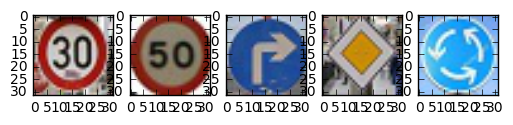

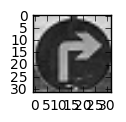

In [10]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

img_folder = 'mytest/'
test_images = np.zeros((5,32,32,3))  
test_labels = [1, 2, 33, 12, 40]     #Defining Labels

for i in range(5):
    image = mpimg.imread(img_folder + "%d.jpg" % (i+1) )
    test_images[i] = image
    plt.subplot(1, 5, i+1)
    plt.imshow(image)

gray_test_images = gray_scale(test_images)
print("gray_test_images shape:",test_images.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** REVIEW UPDATE: The images I chose came up from a Google search for german traffic signs. I was particularly careful to steer clear from the GTSRB dataset (which would lead essentially testing the model on training data). Some of the images were cropped and resized to the specs for LeNet. Some of the images are cropped aggressively (Ex: 50 speed limit sign, which can lead to interfering with identifying characteristics like ovals/circles). Also, The 30 speedlimit sign has some irregularity/patch which may interefere with accurate classification.

In [11]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(gray_test_images, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model predicted 5 out of 5 signs correctly. But not consistently. I believe its the 30 speed limit sign thats being inaccurately predicted due to irregularities on the surfaces/ aggressive cropping.

Actual Label: 1
Output Label: 1
Actual Label: 2
Output Label: 2
Actual Label: 33
Output Label: 33
Actual Label: 12
Output Label: 12
Actual Label: 40
Output Label: 40


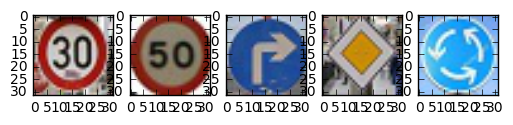

In [12]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
plot = plt.figure()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_softmax_logits = sess.run(softmax, feed_dict={x: gray_test_images, keep_prob: 1.0})
    test_top_k = sess.run(top_k, feed_dict={x: gray_test_images, keep_prob: 1.0})

for i in range(5):
    image = mpimg.imread(img_folder + "%d.jpg" % (i+1) )
    grid = plot.add_subplot(1,5,i+1)
    grid.imshow(image)        
    print("Actual Label:",test_labels[i])
    print("Output Label:",test_top_k[1][i][0])
    
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** REVIEW UPDATE: Please find values below. It seems the model is not fully certain on the prediction for the second image (50 speed limit). This again could most likely to attributed to aggressive image cropping. But overall, The top predictions do appear. 

In [15]:
print(test_top_k[0])
print("----------------------------------------------------------------------")
print(test_top_k[1])

[[  9.99990344e-01   5.55513816e-06   4.00113959e-06]
 [  7.53300369e-01   1.77500203e-01   4.61853258e-02]
 [  9.86722767e-01   8.45847186e-03   3.69613501e-03]
 [  1.00000000e+00   1.72248152e-15   3.11670766e-20]
 [  9.59696233e-01   1.45536279e-02   1.32085523e-02]]
----------------------------------------------------------------------
[[ 1  2  0]
 [ 2  1  6]
 [33 36 14]
 [12 40  2]
 [40 38 12]]


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.